In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats
import json
import os

os.chdir(r'D:\Py_Projects\neuro')

In [34]:
with open('models/statistic/DTDNNSS_100p_5vox_002.json', 'r') as f:
    dtdnnss2 = json.load(f)

with open('models/statistic/DeepSpeaker_100pers_10vox_20mfcc_tripl_011.json', 'r') as f:
    dtdnnss1 = json.load(f)
    
with open('models/statistic/ResNet34_100p_5vox_001.json', 'r') as f:
    resnet1 = json.load(f)   

In [35]:
dtdnnss1_df = pd.DataFrame([*dtdnnss1.values()][:-1])
dtdnnss2_df = pd.DataFrame([*dtdnnss2.values()][:-1])
resnet1_df = pd.DataFrame([*resnet1.values()][:-1])

<Axes: >

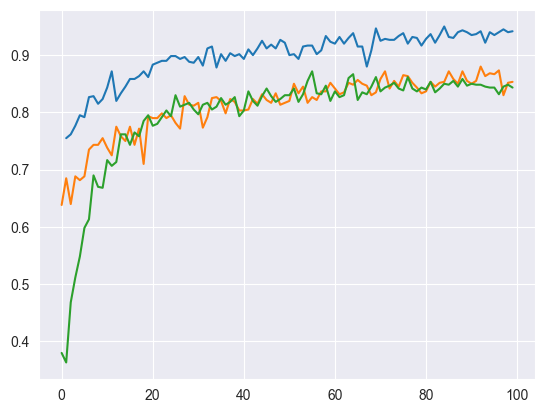

In [39]:
dtdnnss1_df['epoch_acc_val'].plot()
dtdnnss2_df['epoch_acc_val'].plot()
resnet1_df['epoch_acc_val'].plot()

<Axes: >

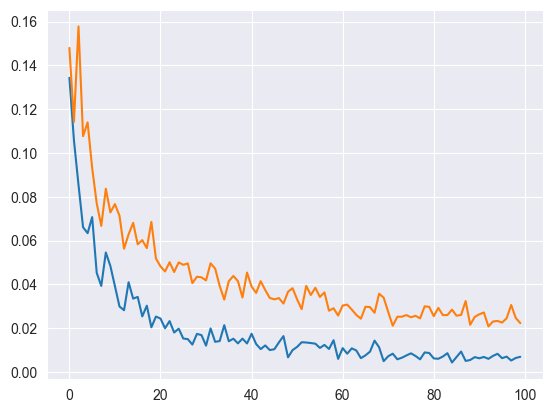

In [31]:
dtdnnss1_df['epoch_loss_val'].plot()
dtdnnss2_df['epoch_loss_val'].plot()

In [16]:
with open('models/correct/DeepSpeaker_100pers_10vox_20mfcc_tripl_011_raw_training.txt', 'r') as f:
    raw_input = f.readlines()

In [18]:
info = []
for line in raw_input:
    if line.startswith('train'):
        info.append(line)

In [27]:
for i, line in enumerate(info):
    line_split = line.strip().split()
    dtdnnss1[f'{i}'].update({'epoch_acc_train': float(line_split[4]),
                             'epoch_loss_train': float(line_split[2])})

In [28]:
dtdnnss1['99']

{'epoch_loss_val': 0.0069284498939911525,
 'epoch_acc_val': 0.9416666666666667,
 'epoch_acc_train': 0.9725,
 'epoch_loss_train': 0.0026}

In [33]:
with open('models/statistic/DeepSpeaker_100pers_10vox_20mfcc_tripl_011.json', 'w') as f:
    json.dump(dtdnnss1, f)